# Variance
We seek to understand the variance of the averaged perceptron ensemble, compared to a regular perceptron and voting perceptron ensemble.

In [40]:
from tqdm.notebook import tqdm
import numpy as np
from sklearn.linear_model import Perceptron
from matplotlib import pyplot as plt
from sklearn import svm, metrics, datasets
import warnings
from IPython.display import display, clear_output
import perceptron
import importlib

importlib.reload(perceptron)
from perceptron import Perceptron as EnsembledPerceptron, Loader


# def warn(*args, **kwargs):
#     pass


# warnings.warn = warn

In [41]:
def run_many(num_runs, epochs, title: str, train_path, test_path=None, test_size=None, dataset_name=None):
    # This should make splits in the same way as initializing an `EnsembledPerceptron`
    train_data, test_data = Loader.load(train_path, test_path, test_size)

    scores = []
    fig, ax = plt.subplots()
    display_id = display(fig, display_id=True)

    # outside the loop so it only loads the data once
    ensembled_perceptron = EnsembledPerceptron(trainpath=train_path, testpath=test_path, test_size=test_size, dataset_name=dataset_name)

    for seed in tqdm(range(num_runs)):
        normal_perceptron = Perceptron(max_iter=epochs, random_state=seed)
        normal_perceptron.fit(train_data[0], train_data[1])
        normal_score = normal_perceptron.score(test_data[0], test_data[1])
        # normal_score = metrics.accuracy_score(test_data[1], normal_perceptron.predict(test_data[0]))

        ensembled_perceptron.train(ensemble_size=epochs, data_opts="window", epoch_size=0.5, log="none")
        ensembled_score = ensembled_perceptron.accuracy

        scores.append([normal_score, ensembled_score])

        # Update plot live
        ax.clear()
        scores_array = np.array(scores)
        ax.violinplot(scores_array, showmeans=True)
        ax.set_xticks([1, 2])
        ax.set_xticklabels(["Perceptron", "Ensembled"])
        ax.set_title(title)
        display_id.update(fig)
        # plt.pause(0.02)

    scores = np.array(scores)
    print(f"Perceptron: {scores[:, 0].mean()} ± {scores[:, 0].std()}")
    print(f"Ensembled: {scores[:, 1].mean()} ± {scores[:, 1].std()}")

    # plt.ioff()
    # plt.show()

    return scores

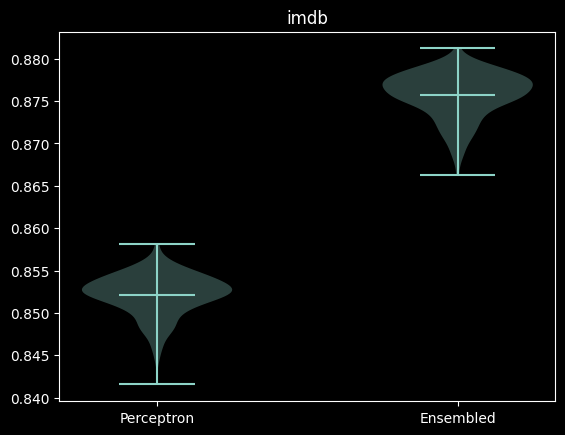

  0%|          | 0/200 [00:00<?, ?it/s]

Perceptron: 0.8521312000000001 ± 0.002505191920791698
Ensembled: 0.8757242 ± 0.0026814425893537186


In [43]:
_ = run_many(num_runs=200, epochs=100, title="imdb", train_path="../data/imdb/train_labeledBow.feat", test_path="../data/imdb/test_labeledBow.feat", dataset_name="imdb")

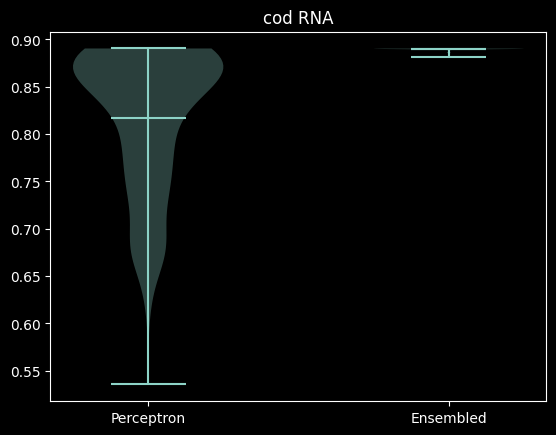

  0%|          | 0/200 [00:00<?, ?it/s]

Perceptron: 0.8170143621349178 ± 0.07520177941443779
Ensembled: 0.889819322 ± 0.0010535038171340441


In [44]:
_ = run_many(num_runs=200, epochs=100, title="cod RNA", train_path="../data/cod-rna/train.txt", test_path="../data/cod-rna/test.txt")

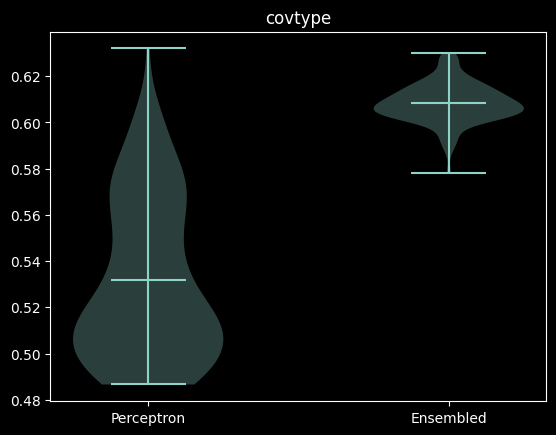

  0%|          | 0/200 [00:00<?, ?it/s]

Perceptron: 0.5317618568979643 ± 0.03469201754863274
Ensembled: 0.6083554225000001 ± 0.008543090253769052


In [45]:
_ = run_many(num_runs=200, epochs=100, title="covtype", train_path="../data/cov/covtype.libsvm.binary")

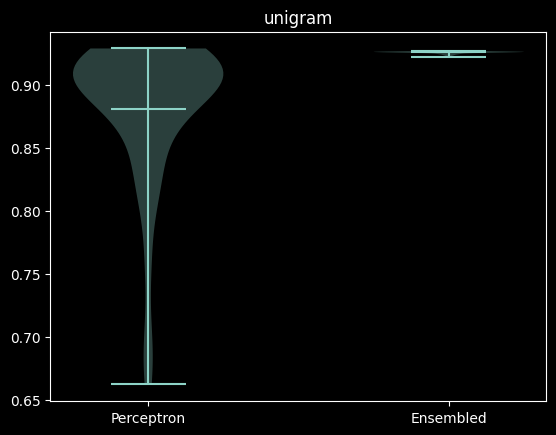

  0%|          | 0/100 [00:00<?, ?it/s]

Perceptron: 0.8807204571428571 ± 0.0584102135194082
Ensembled: 0.9257046870000001 ± 0.0009312256497385549


In [46]:
_ = run_many(num_runs=100, epochs=100, title="unigram", train_path="../data/webspam/unigram.svm")

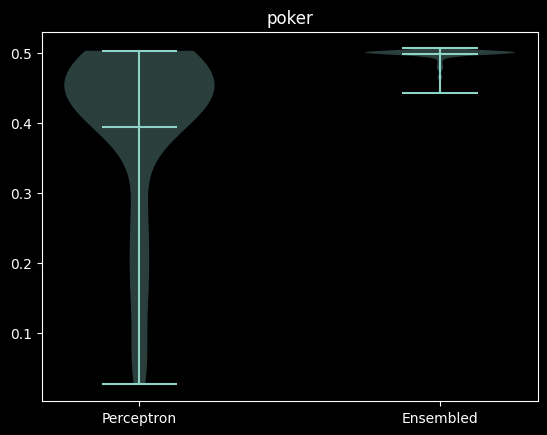

  0%|          | 0/200 [00:00<?, ?it/s]

Perceptron: 0.39454506 ± 0.12405948930729323
Ensembled: 0.497833775 ± 0.008360811193561007


In [47]:
_ = run_many(num_runs=200, epochs=200, title="poker", train_path="../data/poker/poker", test_path="../data/poker/poker.t")